In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../application_data/cleaned_data_before_transform.csv')
df.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,WEEKDAY_APPR_PROCESS_START,IS_EMPLOYED
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.018801,2,2,0,0,0,0,1,WEDNESDAY,1
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003541,1,1,0,0,0,0,0,MONDAY,1
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010032,2,2,0,0,0,0,0,MONDAY,1
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008019,2,2,0,0,0,0,0,WEDNESDAY,1
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028663,2,2,0,1,0,0,0,THURSDAY,1


In [3]:
df_processed = pd.read_csv('../application_data/cleaned_data_scaled.csv')
df_processed.head()

,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_CONTRACT_TYPE_Cash loans,...,OBS_60_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET,IS_EMPLOYED
0,-1.388135,1.388176,-0.003607,0.08734,-0.08734,0.717914,-0.717914,-0.664531,0.664531,0.324395,...,0.252132,-0.149452,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,1.0,0.468635
1,0.720391,-0.720370,-0.003607,0.08734,-0.08734,0.717914,-0.717914,1.504820,-1.504820,0.324395,...,-0.168527,-1.252750,-2.067573,-2.051813,-0.291208,-0.547236,-0.124004,-0.231267,0.0,0.468635
2,-1.388135,1.388176,-0.003607,0.08734,-0.08734,-1.392925,1.392925,-0.664531,0.664531,-3.082659,...,-0.589187,-0.783451,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,0.0,0.468635
3,0.720391,-0.720370,-0.003607,0.08734,-0.08734,0.717914,-0.717914,-0.664531,0.664531,0.324395,...,0.252132,-0.928991,-0.103064,-0.062699,-0.291208,-0.547236,-0.124004,-0.231267,0.0,0.468635
4,-1.388135,1.388176,-0.003607,0.08734,-0.08734,0.717914,-0.717914,-0.664531,0.664531,0.324395,...,-0.589187,0.563570,-0.103064,-0.062699,-0.291208,1.827367,-0.124004,-0.231267,0.0,0.468635


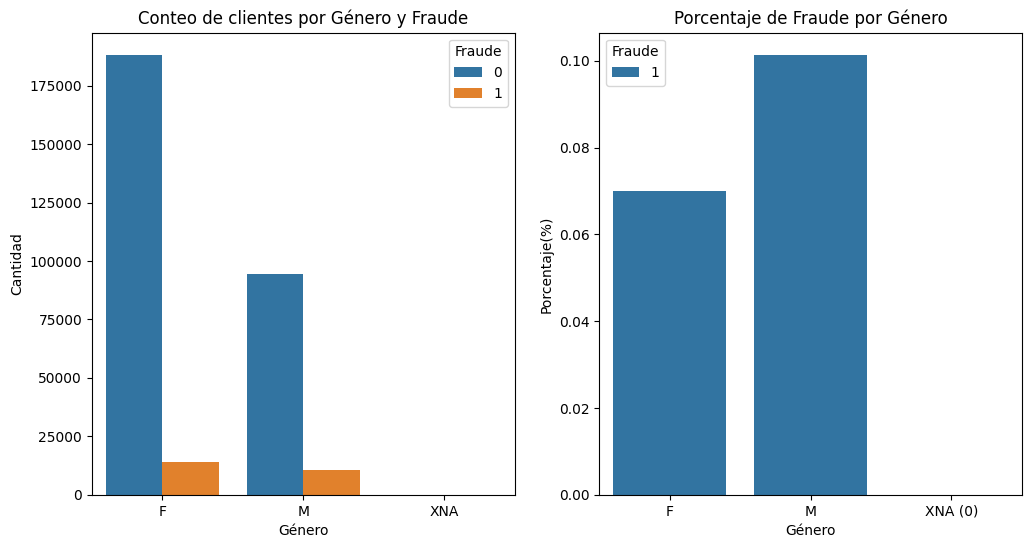

In [42]:
df_gender = df.groupby(["CODE_GENDER", "TARGET"])["TARGET"].count().reset_index(name="count")

df_gender_percent= df.groupby(["CODE_GENDER"])["TARGET"].value_counts(normalize=True).rename('percentage').reset_index()

# Hacemos el barplot
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.barplot(ax=ax1,
    data=df_gender,
    x="CODE_GENDER",
    y="count",
    hue="TARGET"   
)
ax1.set_title("Conteo de clientes por Género y Fraude")
ax1.set_ylabel("Cantidad")
ax1.set_xlabel("Género")
ax1.legend(title='Fraude', loc='upper right')


ax2 = fig.add_subplot(122)
sns.barplot(ax=ax2,
    data=df_gender_percent[df_gender_percent["TARGET"]==1],
    x="CODE_GENDER",
    y="percentage",
    hue="TARGET"  
)
ax2.set_title("Porcentaje de Fraude por Género")
ax2.set_ylabel("Porcentaje(%)")
ax2.set_xlabel("Género")
ax2.set_xticks(range(3))
ax2.set_xticklabels(['F', 'M', 'XNA (0)'])
ax2.set_xlim(-0.5, 2.5)
ax2.legend(title='Fraude', loc='upper left')

plt.show()

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_18596\2475438811.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")
C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_18596\2475438811.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_percent = df_age.groupby(["AGE_BIN"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()


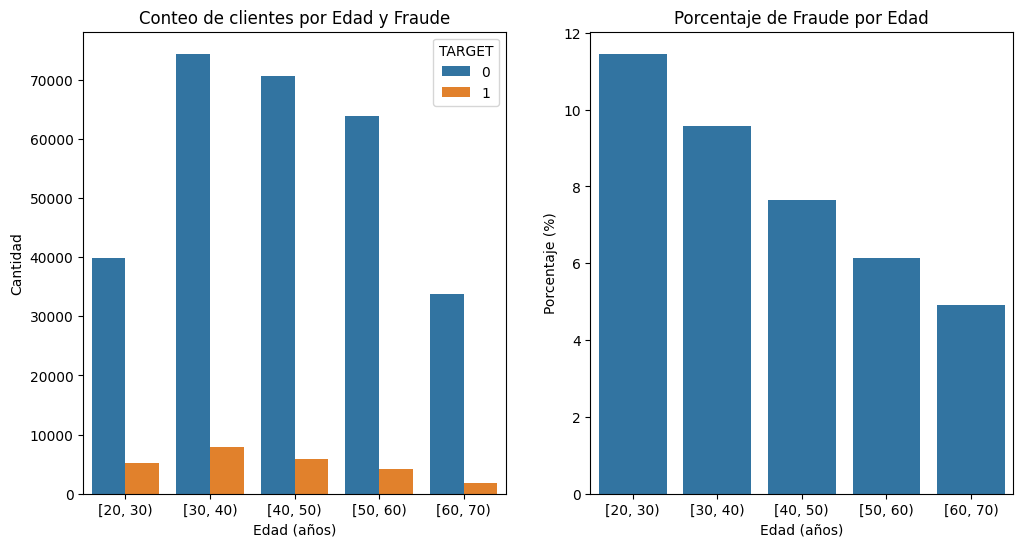

In [5]:
df_age = df[['DAYS_BIRTH','TARGET']].copy()
df_age['YEARS_BIRTH'] = (df_age['DAYS_BIRTH'] / -365).astype(int)
df_age.drop(columns='DAYS_BIRTH')
df_age['AGE_BIN'] = pd.cut(df_age['YEARS_BIRTH'], bins=range(df_age['YEARS_BIRTH'].min(), round(df_age['YEARS_BIRTH'].max(),-1)+1, 10), right=False)
df_age_count = df_age.groupby(['AGE_BIN','TARGET'])['TARGET'].count().reset_index(name="count")

df_age_percent = df_age.groupby(["AGE_BIN"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Hacemos el barplot
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(ax = ax1,
    data=df_age_count,
    x="AGE_BIN",
    y="count",
    hue="TARGET",
)
ax1.set_title("Conteo de clientes por Edad y Fraude")
ax1.set_ylabel("Cantidad")
ax1.set_xlabel("Edad (años)")

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(ax = ax2,
    data=df_age_percent[df_age_percent['TARGET'] == 1],
    x="AGE_BIN",
    y="percent",

)
ax2.set_title("Porcentaje de Fraude por Edad")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_xlabel("Edad (años)")
plt.show()

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_18596\584139213.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_emp_years_count = df_emp.groupby(['YEARS_BIN','TARGET'])['TARGET'].count().reset_index(name="count")
C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_18596\584139213.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_emp_years_percent = df_emp.groupby(["YEARS_BIN"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()


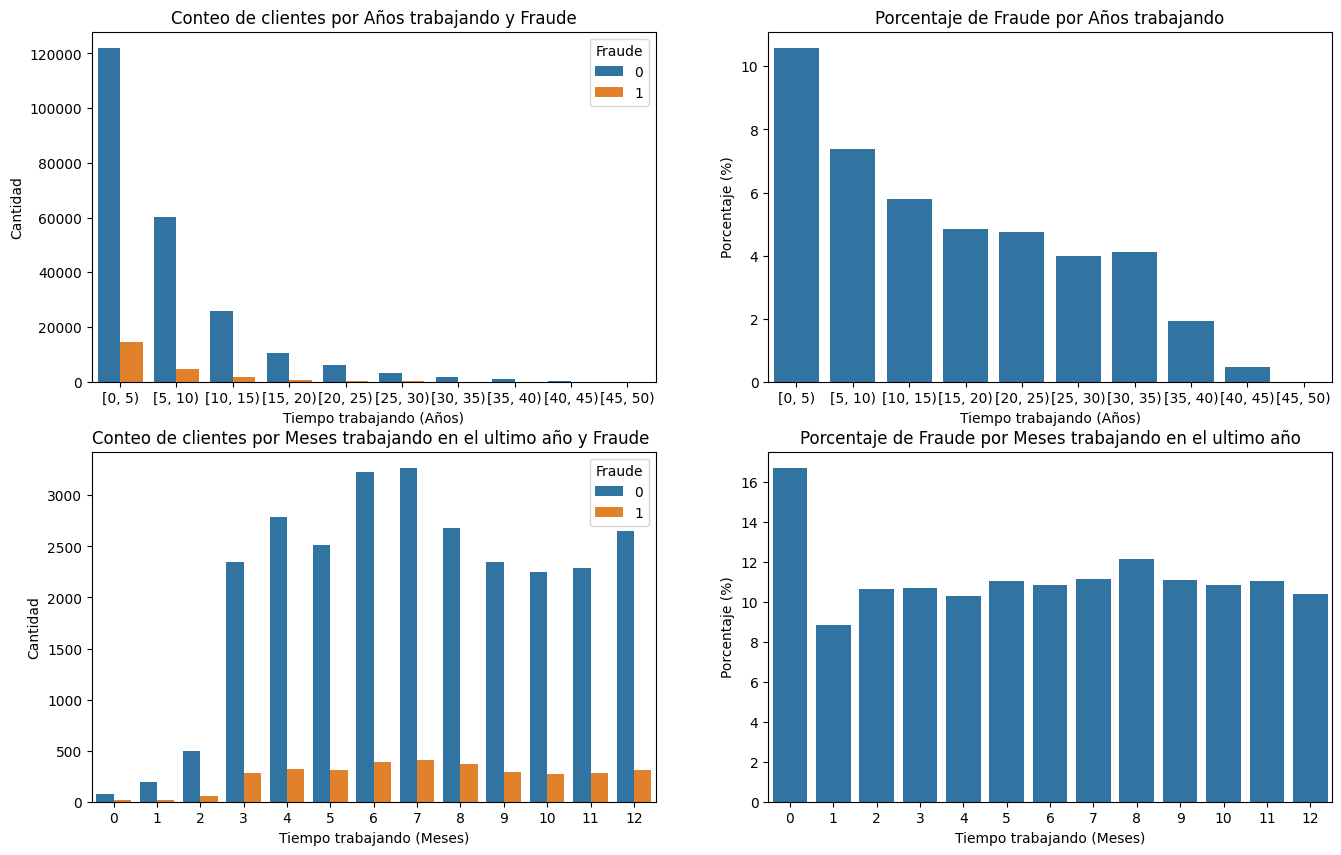

In [44]:
df_emp = df[['DAYS_EMPLOYED','TARGET']].copy()
df_emp['YEARS_EMPLOYED'] = (df_emp['DAYS_EMPLOYED'] / -365).astype(int)
df_emp['MONTHS_EMPLOYED'] = (df_emp['DAYS_EMPLOYED'] / -30).astype(int)
df_emp = df_emp[df_emp['DAYS_EMPLOYED'] != 0]
df_emp['YEARS_BIN'] = pd.cut(df_emp['YEARS_EMPLOYED'], bins=range(df_emp['YEARS_EMPLOYED'].min(), round(df_emp['YEARS_EMPLOYED'].max(),-1)+1, 5), right=False)


df_emp_years_count = df_emp.groupby(['YEARS_BIN','TARGET'])['TARGET'].count().reset_index(name="count")
df_emp_months_count = df_emp.groupby(['MONTHS_EMPLOYED','TARGET'])['TARGET'].count().reset_index(name="count")

df_emp_months_percent = df_emp.groupby(["MONTHS_EMPLOYED"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_emp_years_percent = df_emp.groupby(["YEARS_BIN"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()


# Hacemos el barplot
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(ax=ax1,
    data=df_emp_years_count,
    x="YEARS_BIN",
    y="count",
    hue="TARGET",
)
ax1.set_title("Conteo de clientes por Años trabajando y Fraude")
ax1.set_ylabel("Cantidad")
ax1.set_xlabel("Tiempo trabajando (Años)")
ax1.legend(title='Fraude', loc='upper right')

ax2 = fig.add_subplot(2,2,2)
sns.barplot(ax=ax2,
    data=df_emp_years_percent[df_emp_years_percent['TARGET'] == 1],
    x="YEARS_BIN",
    y="percent",
)
ax2.set_title("Porcentaje de Fraude por Años trabajando")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_xlabel("Tiempo trabajando (Años)")


ax3 = fig.add_subplot(2,2,3)
sns.barplot(ax=ax3,
    data=df_emp_months_count[df_emp_months_count['MONTHS_EMPLOYED'] <= 12],
    x="MONTHS_EMPLOYED",
    y="count",
    hue="TARGET",
)
ax3.set_title("Conteo de clientes por Meses trabajando en el ultimo año y Fraude ")
ax3.set_ylabel("Cantidad")
ax3.set_xlabel("Tiempo trabajando (Meses)")
ax3.legend(title='Fraude', loc='upper right')

ax4 = fig.add_subplot(2,2,4)
sns.barplot(ax=ax4,
    data=df_emp_months_percent[(df_emp_months_percent['TARGET'] == 1) & (df_emp_months_percent['MONTHS_EMPLOYED'] <= 12)],
    x="MONTHS_EMPLOYED",
    y="percent",
)
ax4.set_title("Porcentaje de Fraude por Meses trabajando en el ultimo año")
ax4.set_ylabel("Porcentaje (%)")
ax4.set_xlabel("Tiempo trabajando (Meses)")

plt.show()

In [52]:
df_emp_months_percent

,MONTHS_EMPLOYED,TARGET,percent
0,0,0,83.333333
1,0,1,16.666667
2,1,0,91.162791
3,1,1,8.837209
4,2,0,89.369369
...,...,...,...
967,571,0,100.000000
968,572,0,100.000000
969,584,0,100.000000
970,586,0,100.000000


Text(0.5, 0, 'Tiempo trabajando (Días)')

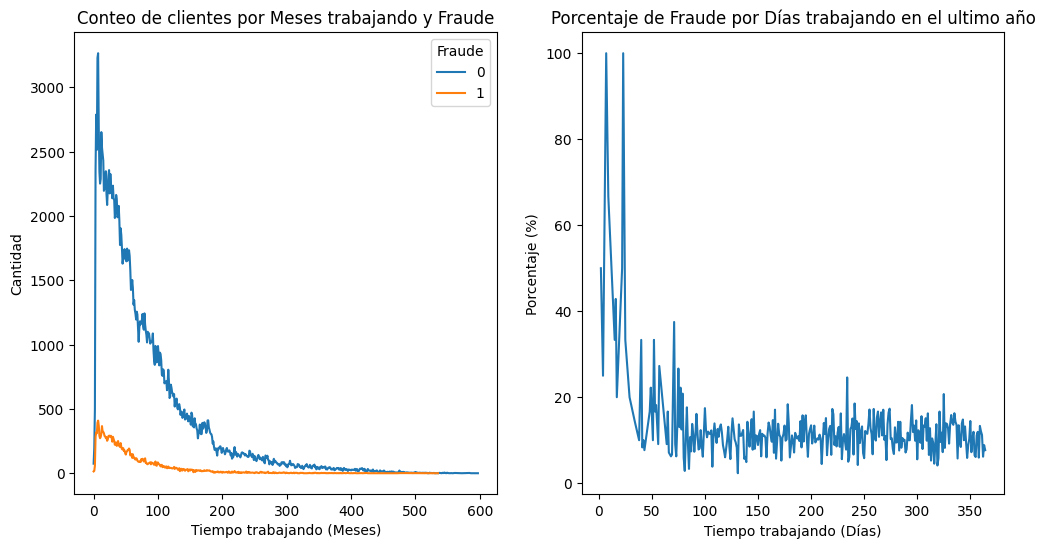

In [69]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.lineplot(ax=ax1,data=df_emp_months_count,x=df_emp_months_count["MONTHS_EMPLOYED"], y="count", hue="TARGET")
ax1.set_title("Conteo de clientes por Meses trabajando y Fraude")
ax1.set_ylabel("Cantidad")
ax1.set_xlabel("Tiempo trabajando (Meses)")
ax1.legend(title='Fraude', loc='upper right')

df_emp_days_percent = df_emp.groupby(["DAYS_EMPLOYED"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_emp_days_percent["DAYS_EMPLOYED"] = df_emp_days_percent["DAYS_EMPLOYED"]*-1

ax2 = fig.add_subplot(122)
sns.lineplot(ax=ax2,data=df_emp_days_percent[(df_emp_days_percent['TARGET'] == 1) & (df_emp_days_percent["DAYS_EMPLOYED"]<365)],x=df_emp_days_percent["DAYS_EMPLOYED"], y="percent")
ax2.set_title("Porcentaje de Fraude por Días trabajando en el ultimo año")
ax2.set_ylabel("Porcentaje (%)")
ax2.set_xlabel("Tiempo trabajando (Días)")

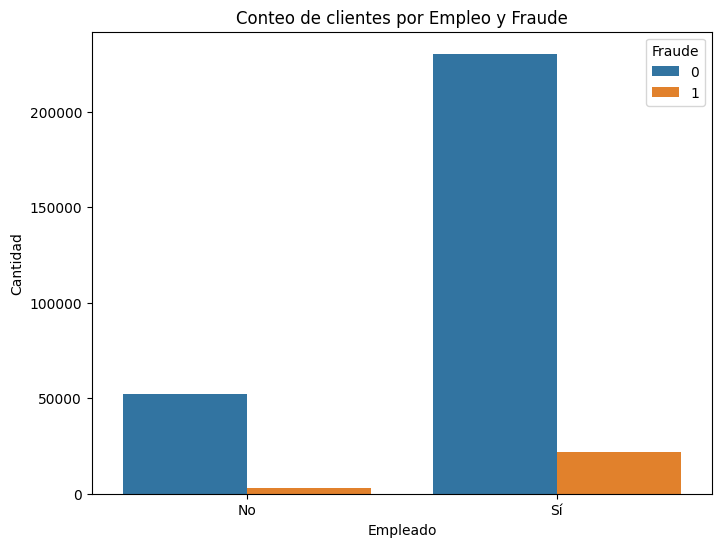

In [7]:
df_emp2 = df[['IS_EMPLOYED','TARGET']].copy()
df_emp2_count = df_emp2.groupby(['IS_EMPLOYED','TARGET'])['TARGET'].count().reset_index(name="count")

# Hacemos el barplot
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_emp2_count,
    x="IS_EMPLOYED",
    y="count",
    hue="TARGET",
)
plt.title("Conteo de clientes por Empleo y Fraude")
plt.ylabel("Cantidad")
plt.xlabel("Empleado")
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.legend(title='Fraude', loc='upper right')
plt.show()

In [8]:
data2 = df[df['AMT_INCOME_TOTAL']<50000000]

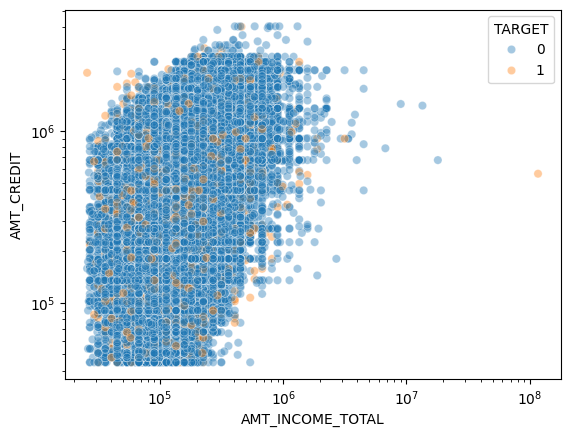

In [9]:
sns.scatterplot(data=df, x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue="TARGET", alpha=0.4)
plt.xscale('log')
plt.yscale("log")

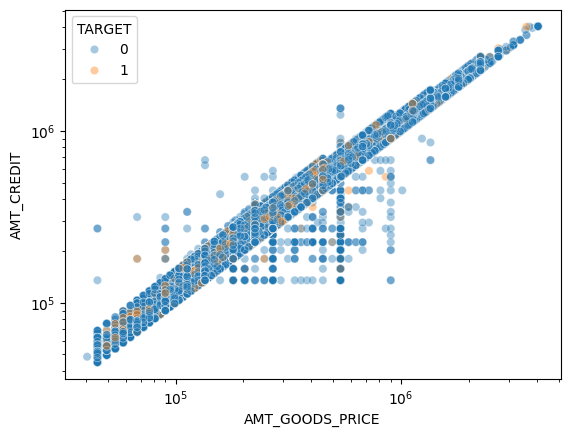

In [10]:
sns.scatterplot(
    data=df, x="AMT_GOODS_PRICE", y="AMT_CREDIT", hue="TARGET", alpha=0.4
)
plt.xscale('log')
plt.yscale("log")

<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

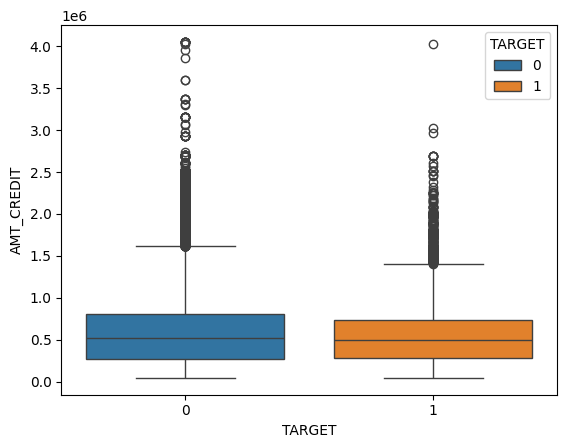

In [11]:
sns.boxplot(data=df, x = 'TARGET',y='AMT_CREDIT',hue='TARGET')

In [12]:
sorted(df['AMT_INCOME_TOTAL'].unique(),reverse=True)[:5]

[117000000.0, 18000090.0, 13500000.0, 9000000.0, 6750000.0]

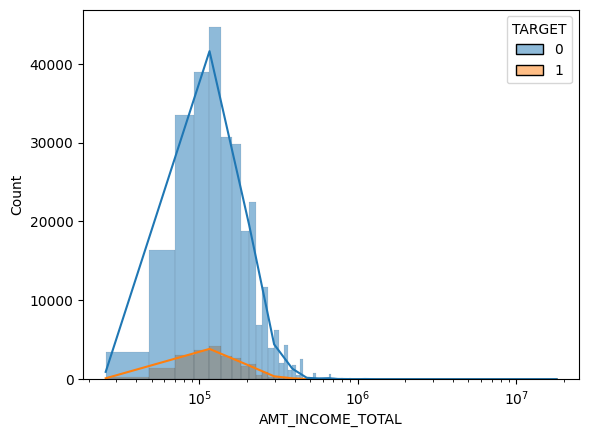

In [13]:
df_filtered = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].max()]
sns.histplot(data=df_filtered, x='AMT_INCOME_TOTAL', bins = 800,kde=True,hue='TARGET')
plt.xscale('log')

plt.show()

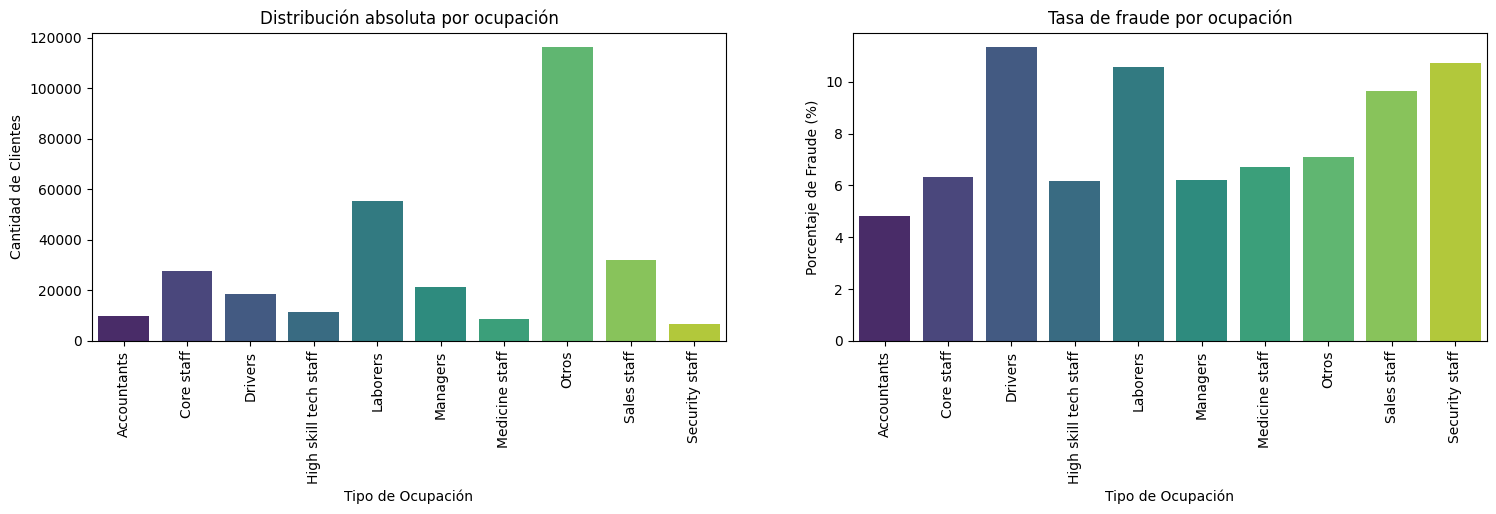

In [14]:
df_jobs= df.groupby(["OCCUPATION_TYPE"])["TARGET"].count().reset_index(name="count")

df_jobs_percent= df.groupby(["OCCUPATION_TYPE"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()


fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(1,2,1)
sns.barplot(ax=ax1,data=df_jobs, x='OCCUPATION_TYPE', y= 'count',hue = 'OCCUPATION_TYPE',palette='viridis')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Distribución absoluta por ocupación")
ax1.set_ylabel('Cantidad de Clientes')
ax1.set_xlabel('Tipo de Ocupación')

ax2 = fig.add_subplot(1,2,2)
sns.barplot(ax=ax2,data=df_jobs_percent[df_jobs_percent['TARGET']==1], x='OCCUPATION_TYPE', y= 'percent', hue = 'OCCUPATION_TYPE',palette='viridis')
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("Tasa de fraude por ocupación")
ax2.set_ylabel('Porcentaje de Fraude (%)')
ax2.set_xlabel('Tipo de Ocupación')

plt.show()

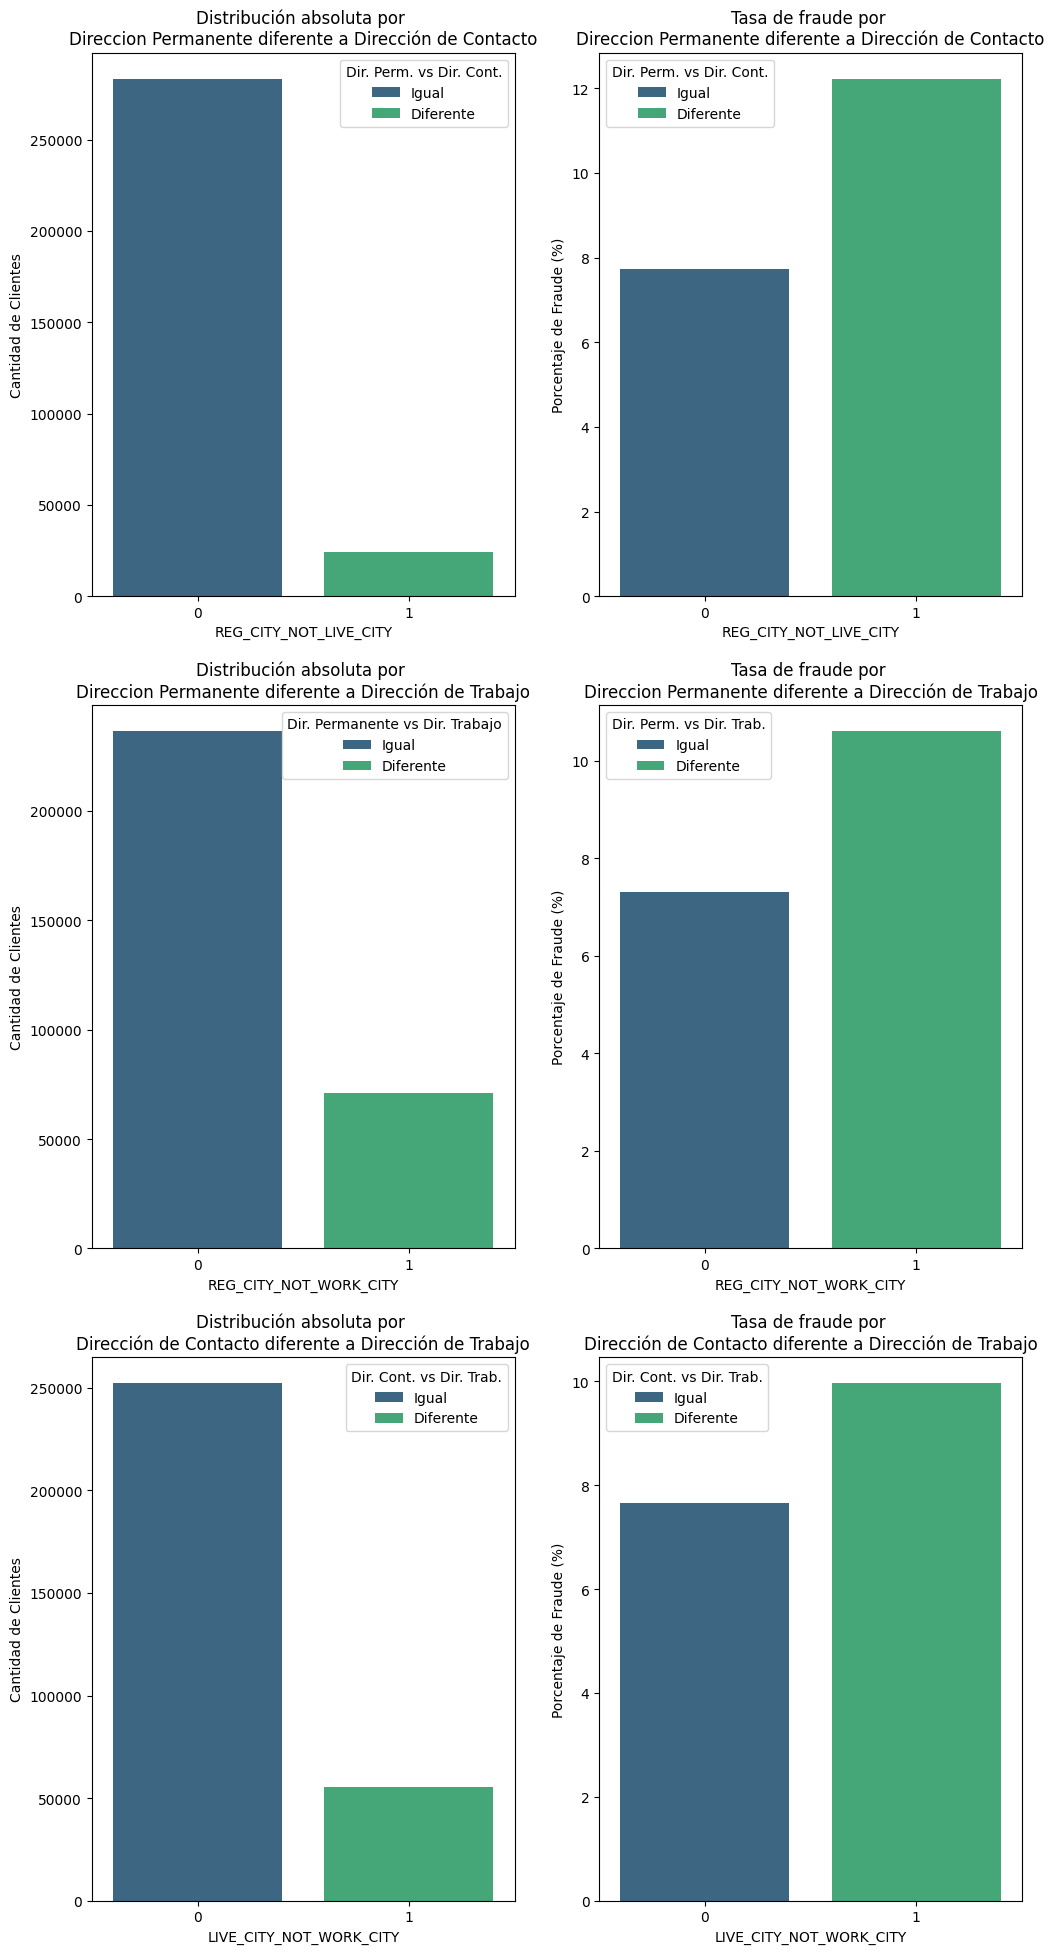

In [15]:
reg_not_live = df.groupby(["REG_CITY_NOT_LIVE_CITY"])["TARGET"].count().reset_index(name="count")
reg_not_live_percent = df.groupby(["REG_CITY_NOT_LIVE_CITY"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()

reg_not_work = df.groupby(["REG_CITY_NOT_WORK_CITY"])["TARGET"].count().reset_index(name="count")
reg_not_work_percent = df.groupby(["REG_CITY_NOT_WORK_CITY"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()

live_not_work = df.groupby(["LIVE_CITY_NOT_WORK_CITY"])["TARGET"].count().reset_index(name="count")
live_not_work_percent = df.groupby(["LIVE_CITY_NOT_WORK_CITY"])["TARGET"].value_counts(normalize=True).mul(100).rename('percent').reset_index()

## Permanent address does not match contact address
fig = plt.figure(figsize=(12,24))
ax1 = fig.add_subplot(3,2,1)
sns.barplot(ax=ax1,data=reg_not_live, x='REG_CITY_NOT_LIVE_CITY', y= 'count',hue = 'REG_CITY_NOT_LIVE_CITY',palette='viridis')
ax1.set_title("Distribución absoluta por \nDireccion Permanente diferente a Dirección de Contacto")
ax1.set_ylabel('Cantidad de Clientes')
ax1.set_xlabel('REG_CITY_NOT_LIVE_CITY')
ax1.legend(ax1.get_legend_handles_labels()[0], ['Igual', 'Diferente'], title='Dir. Perm. vs Dir. Cont.')

ax2 = fig.add_subplot(3,2,2)
sns.barplot(ax=ax2,data=reg_not_live_percent[reg_not_live_percent['TARGET']==1], x='REG_CITY_NOT_LIVE_CITY', y= 'percent', hue = 'REG_CITY_NOT_LIVE_CITY',palette='viridis')
ax2.set_title("Tasa de fraude por \nDireccion Permanente diferente a Dirección de Contacto")
ax2.set_ylabel('Porcentaje de Fraude (%)')
ax2.set_xlabel('REG_CITY_NOT_LIVE_CITY')
ax2.legend(ax2.get_legend_handles_labels()[0], ['Igual', 'Diferente'], title='Dir. Perm. vs Dir. Cont.')

## Permanent address does not match work address
ax3 = fig.add_subplot(3,2,3)
sns.barplot(ax=ax3,data=reg_not_work, x='REG_CITY_NOT_WORK_CITY', y= 'count',hue = 'REG_CITY_NOT_WORK_CITY',palette='viridis')
ax3.set_title("Distribución absoluta por \nDireccion Permanente diferente a Dirección de Trabajo")
ax3.set_ylabel('Cantidad de Clientes')
ax3.set_xlabel('REG_CITY_NOT_WORK_CITY')
ax3.legend(ax3.get_legend_handles_labels()[0], ['Igual', 'Diferente'], title='Dir. Permanente vs Dir. Trabajo')

ax4 = fig.add_subplot(3,2,4)
sns.barplot(ax=ax4,data=reg_not_work_percent[reg_not_work_percent['TARGET']==1], x='REG_CITY_NOT_WORK_CITY', y= 'percent', hue = 'REG_CITY_NOT_WORK_CITY',palette='viridis')
ax4.set_title("Tasa de fraude por \nDireccion Permanente diferente a Dirección de Trabajo")
ax4.set_ylabel('Porcentaje de Fraude (%)')
ax4.set_xlabel('REG_CITY_NOT_WORK_CITY')
ax4.legend(ax4.get_legend_handles_labels()[0], ['Igual', 'Diferente'], title='Dir. Perm. vs Dir. Trab.')

## contact address does not match work address
ax5 = fig.add_subplot(3,2,5)
sns.barplot(ax=ax5,data=live_not_work, x='LIVE_CITY_NOT_WORK_CITY', y= 'count',hue = 'LIVE_CITY_NOT_WORK_CITY',palette='viridis')
ax5.set_title("Distribución absoluta por \nDirección de Contacto diferente a Dirección de Trabajo")
ax5.set_ylabel('Cantidad de Clientes')
ax5.set_xlabel('LIVE_CITY_NOT_WORK_CITY')
ax5.legend(ax5.get_legend_handles_labels()[0], ['Igual', 'Diferente'], title='Dir. Cont. vs Dir. Trab.')

ax6 = fig.add_subplot(3,2,6)
sns.barplot(ax=ax6,data=live_not_work_percent[live_not_work_percent['TARGET']==1], x='LIVE_CITY_NOT_WORK_CITY', y= 'percent', hue = 'LIVE_CITY_NOT_WORK_CITY',palette='viridis')
ax6.set_title("Tasa de fraude por \nDirección de Contacto diferente a Dirección de Trabajo")
ax6.set_ylabel('Porcentaje de Fraude (%)')
ax6.set_xlabel('LIVE_CITY_NOT_WORK_CITY')
ax6.legend(ax6.get_legend_handles_labels()[0], ['Igual', 'Diferente'], title='Dir. Cont. vs Dir. Trab.')


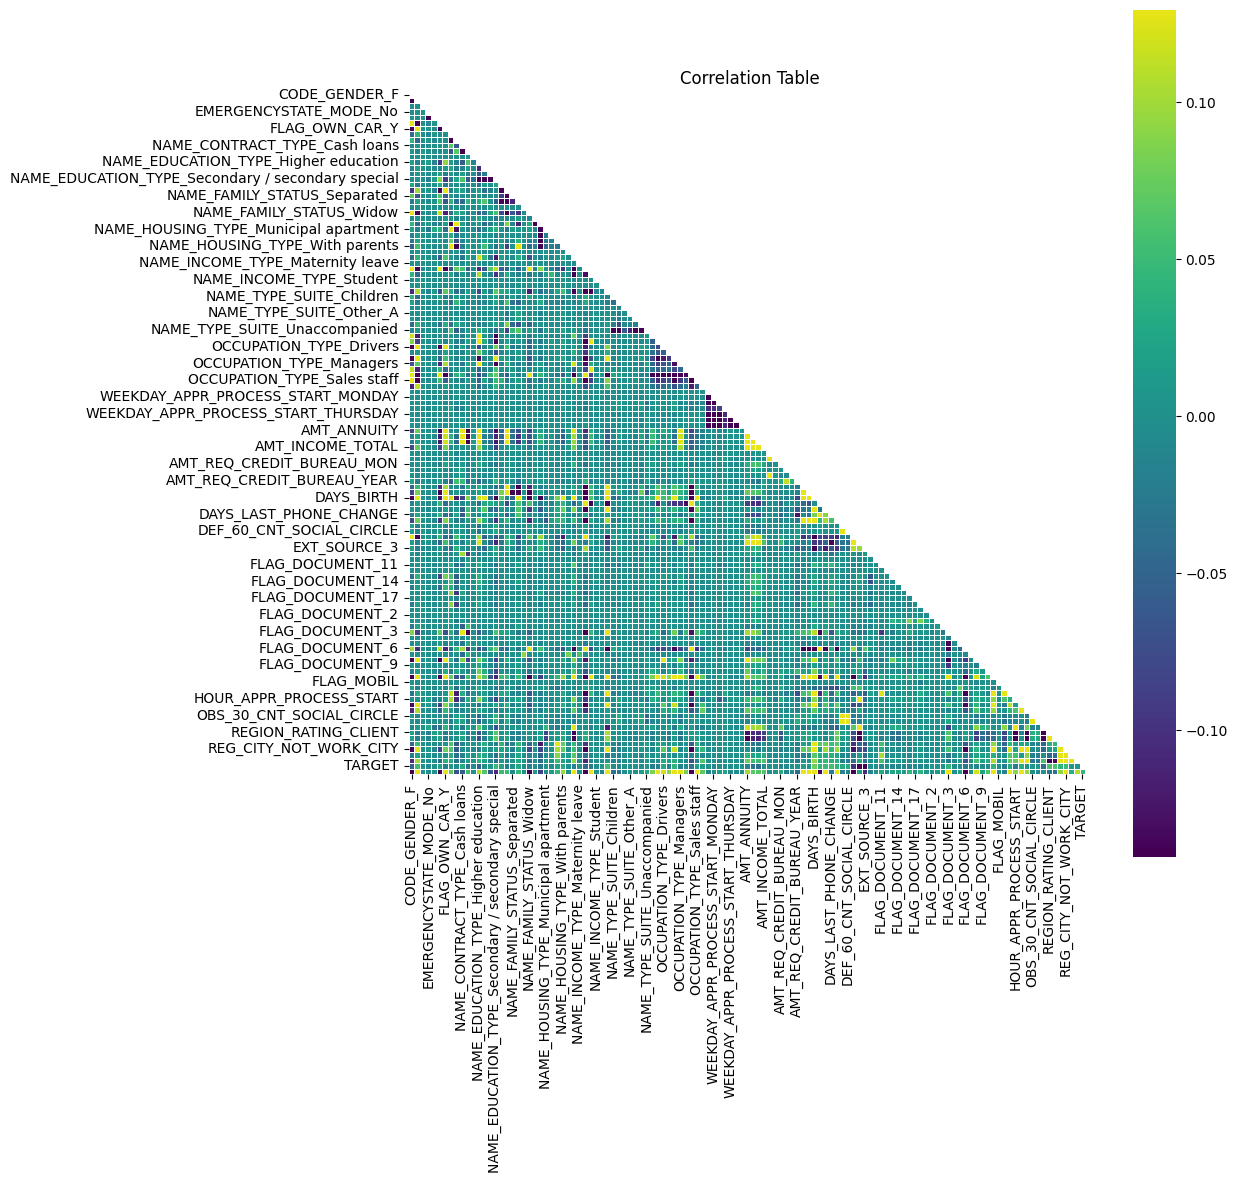

In [16]:
plt.figure(figsize = (11,11))
corr = df_processed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6)
plt.title('Correlation Table')
plt.show()

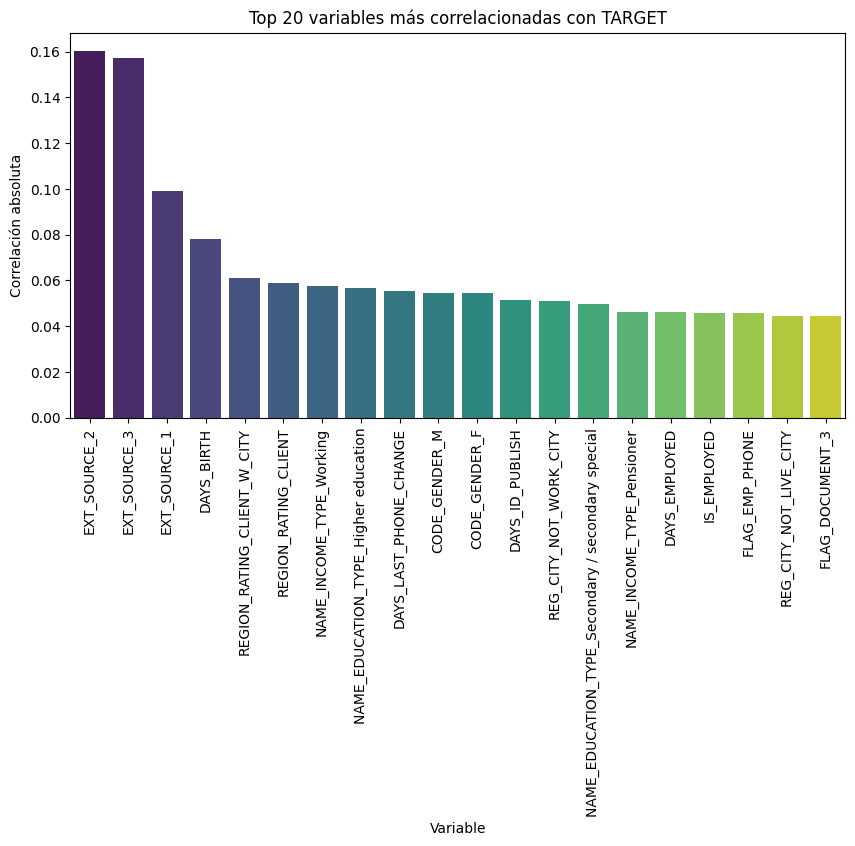

In [17]:
corr_target = df_processed.corr()['TARGET'].abs().sort_values(ascending=False)[1:21]  # Excluye TARGET mismo
plt.figure(figsize=(10,5))
sns.barplot(x=corr_target.index, y=corr_target.values, hue =corr_target.index , palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 variables más correlacionadas con TARGET')
plt.ylabel('Correlación absoluta')
plt.xlabel('Variable')
plt.show()